In [1]:
import os
import random
import torchaudio
import torch
from tqdm import tqdm
import matplotlib.pyplot as plt



In [2]:
#create a file with names of cricket audio file: raw data (later to be used to shuffle and use them as train and test data)
wav_dir = "/gpfs/proj1/choe_lab/tanu/Species_classification/raw_audio/species_in_gryllus_genus/"
wav_files_list = sorted(os.listdir(wav_dir))
datafile_path = r'/gpfs/proj1/choe_lab/tanu/Species_classification/raw_data/raw_data.txt'
# with open(datafile_path, 'w') as data:
#   for item in wav_files_list:
#     data.write(item + "\n")


In [3]:
#R00-007_208127_G. lineaticeps.wav': 'lineaticeps 0',
datafile = datafile_path
with open(datafile, 'r') as file:
  lines = [line.strip() for line in file.readlines()]
# print(lines)
print(len(lines))

species_dict = {}
for line in lines:
  text_after_G = line.split("G. ")[1]
  species = text_after_G.split(" ")[0]
  if species.find(".wav") != -1 or species.find(".WAV") != -1:
    species = species[:-4]

  if species in species_dict:
    species_dict[species].append(line)
  else:
    species_dict[species] = [line]

print(len(species_dict))

592
11


In [4]:
#get the number of audio files for each species. we will later filter on audio files with minimum 10,50 and 70 files.
species_count = {}

for species,items in species_dict.items():
  species_count[species] = len(items)

species_count = dict(sorted(species_count.items(), key = lambda item: item[1]))
print(species_count)


{'chisosensis': 2, 'brevicaudus': 7, 'cohni': 18, 'fultoni': 20, 'leei': 33, 'assimilis': 33, 'integer': 52, 'firmus': 68, 'lineaticeps': 78, 'armatus': 83, 'lightfooti': 198}


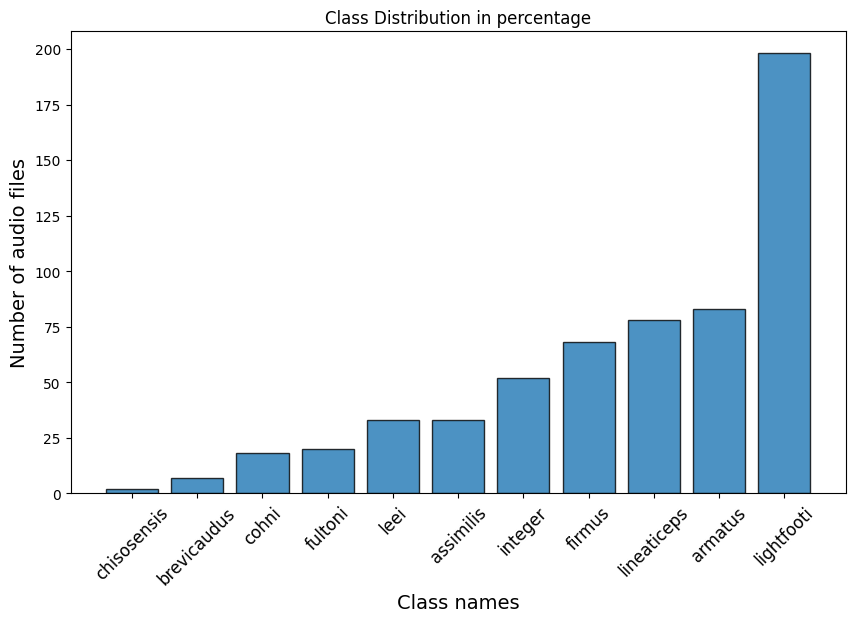

In [11]:
classes = list(species_count.keys())
samples = list(species_count.values())

#create a histogram
plt.figure(figsize = (10,6))
plt.bar(classes, samples, edgecolor = 'black', alpha = 0.8)
plt.xlabel("Class names",fontsize = 14)
plt.ylabel("Number of audio files",fontsize = 14)
plt.title("Class Distribution in percentage")
plt.xticks(rotation = 45, fontsize = 12) #rotate x-axis labels for readability

#plt.show()

dpi = 80
figurename = "species_class_distribution_plot.png"
plt.savefig(figurename, dpi=dpi)


In [9]:
#select only thise species having >=10 audio files
species_list = [(species, count) for species,count in species_count.items() if count >= 10 ]
print(species_list)

[('lineaticeps', 78), ('fultoni', 20), ('firmus', 68), ('integer', 52), ('leei', 33), ('lightfooti', 198), ('armatus', 83), ('assimilis', 33), ('cohni', 18)]


In [26]:
#select only thise species having >=70 audio files
species_list_3 = [(species, count) for species,count in species_count.items() if count >= 70 ]
print(species_list_3)

[('lineaticeps', 78), ('lightfooti', 198), ('armatus', 83)]


In [84]:
#select only thise species having >=50 audio files
species_list_5 = [(species, count) for species,count in species_count.items() if count >= 50 ]
print(species_list_5)

[('lineaticeps', 78), ('firmus', 68), ('integer', 52), ('lightfooti', 198), ('armatus', 83)]


In [7]:
print(len(lines))

592


In [12]:
#take the species with 10 numbers of audio files
def filter_species_filecount(wav_file_list,num):
    waveform_list = {}
    #wavfile_list = {}
    for iter, wav_file in enumerate(tqdm(wav_file_list)):
      text_after_G = wav_file.split("G. ")[1]
      species = text_after_G.split(" ")[0],
      if species.find(".wav") != -1 or species.find(".WAV") != -1:
        species = species[:-4]
      wav, sample_rate = torchaudio.load(os.path.join(wav_dir, wav_file))
      duration = float(wav.shape[1]) / sample_rate
      if species_count[species] >= num: #  number of audio files atleast num
        #wavfile_list[wav_file] = duration
        waveform_list[wav_file] = wav

    return waveform_list
      


In [13]:
#This is for 9 species
print(len(wavfile_list))
# print(waveform_list)
print(len(waveform_list))

582
582


In [118]:
#For another experiment with 9 species
waveform_list_9 = filter_species_filecount(wav_file_list, num = 10)
print(len(waveform_list_9))

100%|█████████████████████████████████████████| 592/592 [00:40<00:00, 14.53it/s]

582


In [87]:
#For another experiment with 5 species
waveform_list_5 = filter_species_filecount(wav_file_list, num = 50)
print(len(waveform_list_5))

100%|█████████████████████████████████████████| 592/592 [00:41<00:00, 14.28it/s]

478


In [34]:
#For another experiment with 3 species
waveform_list_3 = filter_species_filecount(wav_file_list, num = 70)
print(len(waveform_list_3))

100%|█████████████████████████████████████████| 592/592 [00:39<00:00, 15.11it/s]

358


In [91]:
#write the wav file names in text files
def write_filenames_into_text(path):
    with open(path, 'w') as data:
        for key,item in waveform_list_5.items():
            data.write(key + "\n")

In [92]:
datafile_path = r'/gpfs/proj1/choe_lab/tanu/Species_classification/raw_data/5_species/data.txt'
write_filenames_into_text(datafile_path)

In [93]:
path =  r'/gpfs/proj1/choe_lab/tanu/Species_classification/raw_data/5_species/data.txt'
with open(path, 'r') as file:
  lines = [line.strip() for line in file.readlines()]
  species_dict1 = {}
  for line in lines:
    text_after_G = line.split("G. ")[1]
    species = text_after_G.split(" ")[0]
    if species.find(".wav") != -1 or species.find(".WAV") != -1:
      species = species[:-4]

    if species in species_dict1:
      species_dict1[species].append(line)
    else:
      species_dict1[species] = [line]

  print(len(species_dict1))
  print(len(lines))

5
478


In [94]:
#shuffle and make two lists
list1,list2 = [],[]
for species,item in species_dict1.items():
  random.shuffle(item)
  split_at = int(0.8 * len(item))
  list1.extend(item[:split_at])
  list2.extend(item[split_at:])


In [95]:
print(len(list1))
print(len(list2))

380
98


In [96]:
def save_text_to_file(filepath, list):
  with open(filepath, 'w') as fp:
    for item in list:
      fp.write(f"{item}\n")

train_path = r'/gpfs/proj1/choe_lab/tanu/Species_classification/raw_data/5_species/train.txt'
test_path = r'/gpfs/proj1/choe_lab/tanu/Species_classification/raw_data/5_species/test.txt'

In [97]:
save_text_to_file(train_path, list1)
save_text_to_file(test_path, list2)